## Descargue las bases de datos

In [41]:
!wget -q https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/common_player_info.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_combine_stats.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/draft_history.csv \
https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/game.csv



1. Tabla games_playoffs_cleaned (Juegos de los Playoffs Filtrados)
Descripción: Esta tabla contiene los datos de los partidos de los Playoffs, filtrados por las temporadas entre 1984 y 2003. Incluye información sobre los equipos, sus resultados, y diversas estadísticas del juego tanto para los equipos locales como los visitantes.

Columnas clave:

game_id: Identificador único del partido.
team_id_home / team_id_away: Identificadores únicos de los equipos que jugaron en casa y fuera.
pts_home / pts_away: Puntos anotados por el equipo local y visitante en cada partido.
wl_home / wl_away: Indicador de victoria o derrota del equipo (W = Ganado, L = Perdido).
season_id: Identificador de la temporada en la que ocurrió el partido.
reb_home / reb_away, ast_home / ast_away, etc.: Estadísticas adicionales como rebotes, asistencias, robos, bloqueos, etc., tanto para los equipos locales como visitantes.
Importancia: Esta tabla es fundamental para analizar el rendimiento de los equipos en los Playoffs a lo largo de las temporadas. Nos permite comparar equipos, analizar victorias y derrotas, y observar tendencias generales en los partidos.

2. Tabla player_game_stats (Estadísticas de Jugadores por Partido)
Descripción: Esta tabla resulta de la combinación (join) entre las estadísticas de los jugadores y los partidos que jugaron en los Playoffs. Contiene información sobre los jugadores individuales y su rendimiento en cada uno de los juegos.

Columnas clave:

person_id: Identificador único de cada jugador.
team_id_home: Identificador del equipo del jugador (coincide con el equipo que jugó en casa en el partido).
pts_home: Puntos anotados por el jugador en el partido.
reb_home, ast_home, stl_home, blk_home, etc.: Otras estadísticas del jugador en el partido, como rebotes, asistencias, robos, bloqueos, etc.
position: La posición del jugador (base, alero, pívot, etc.).
season_exp: Número de años que el jugador ha jugado en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera.
Importancia: Esta tabla es esencial para analizar el rendimiento de los jugadores, identificando quiénes han sido los más destacados en los Playoffs. Nos permite comparar el desempeño de jugadores por puntos, rebotes, asistencias, etc., y estudiar su evolución a lo largo del tiempo.

3. Tabla players_combined_cleaned (Jugadores Combinada y Limpia)
Descripción: Esta tabla contiene la información combinada de los jugadores que han jugado en los equipos durante los Playoffs. Ha sido filtrada y limpia para eliminar columnas irrelevantes, conservando solo la información clave que necesitamos para el análisis.

Columnas clave:

person_id: Identificador único del jugador (clave para combinar con otras tablas).
first_name / last_name: Nombres y apellidos del jugador.
team_id: Identificador del equipo al que perteneció el jugador.
position: Posición del jugador (base, alero, pívot, etc.).
height / weight: Altura y peso del jugador.
season_exp: Número de años de experiencia del jugador en la NBA.
from_year / to_year: Años en los que el jugador comenzó y terminó su carrera

Importe las liberrias

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
pd.set_option('display.max_columns', None)

Caraga las tablas:

```
'common_player_info.csv'
'draft_combine_stats.csv'
'game.csv'
```
 y llamelas: `players_df, combine_stats_df y games_df`


In [44]:
players_df = pd.read_csv('common_player_info.csv')
combine_stats_df = pd.read_csv('draft_combine_stats.csv')
games_df = pd.read_csv('game.csv')

Paso 1: Filtrar las Temporadas de 1984 a 2003
Dado el formato de las temporadas que mencionas (como 21984, 31984, 41984, etc.), primero identificaremos todas las temporadas que están entre 1984 y 2003. Luego, creamos una condición para filtrar el DataFrame basado en estas temporadas. Utilice algo como

In [45]:
recent_seasons = [
       21984, 41984, 31984, 21985, 41985, 31985, 21986, 41986, 31986,
       21987, 41987, 31987, 21988, 41988, 31988, 21989, 41989, 31989,
       21990, 41990, 31990, 21991, 41991, 31991, 21992, 41992, 31992,
       21993, 31993, 21994, 41994, 31994, 21995, 31995, 21996, 41996,
       31996, 21997, 41997, 31997, 21998, 41998, 21999, 31999, 22000,
       42000, 32000, 22001, 32001, 22002, 42002, 32002, 22003, 42003,
       32003]


# Filtrar el DataFrame por las últimas temporadas
games_filtrados  = games_df[games_df['season_id'].isin(recent_seasons)]


Paso 2: Filtrar Solo Partidos de Playoffs
Para filtrar los partidos que son solo de Playoffs, asumimos que hay una columna como season_type que indica el tipo de temporada (por ejemplo, Regular o Playoffs).

In [46]:
# Filtrar solo partidos de Playoffs
filtro_oficial= games_filtrados[games_filtrados["season_type"]=='Playoffs']
# Verificar cuántos partidos de Playoffs quedaron
filtro_oficial["game_id"].nunique()

1161

Paso 2: Unir Datos Relevantes
Unimos las tablas clave para relacionar la información de los jugadores con los partidos en los que participaron y su rendimiento en el juego. Esto permitirá conectar atributos físicos con el desempeño en partidos.

*  Una players con combinate stats por las columnas person id y player id y llamelo players_combined
*  Una players_combinet con la data filtrada de los juegos en los playoffs games_playoffss y llamelo como player_game_stats


In [47]:
# Merge de las tablas relevantes: jugadores y estadísticas combinadas
players_combined = pd.merge(players_df, combine_stats_df, left_on='person_id', right_on='player_id', how='left')
player_game_stats = pd.merge(players_combined, filtro_oficial, left_on='team_id', right_on='team_id_home', how='left')

In [48]:
players_combined.head(5)

,person_id,first_name_x,last_name_x,display_first_last,display_last_comma_first,display_fi_last,player_slug,birthdate,school,country,last_affiliation,height,weight_x,season_exp,jersey,position_x,rosterstatus,games_played_current_season_flag,team_id,team_name,team_abbreviation,team_code,team_city,playercode,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag,season,player_id,first_name_y,last_name_y,player_name,position_y,height_wo_shoes,height_wo_shoes_ft_in,height_w_shoes,height_w_shoes_ft_in,weight_y,wingspan,wingspan_ft_in,standing_reach,standing_reach_ft_in,body_fat_pct,hand_length,hand_width,standing_vertical_leap,max_vertical_leap,lane_agility_time,modified_lane_agility_time,three_quarter_sprint,bench_press,spot_fifteen_corner_left,spot_fifteen_break_left,spot_fifteen_top_key,spot_fifteen_break_right,spot_fifteen_corner_right,spot_college_corner_left,spot_college_break_left,spot_college_top_key,spot_college_break_right,spot_college_corner_right,spot_nba_corner_left,spot_nba_break_left,spot_nba_top_key,spot_nba_break_right,spot_nba_corner_right,off_drib_fifteen_break_left,off_drib_fifteen_top_key,off_drib_fifteen_break_right,off_drib_college_break_left,off_drib_college_top_key,off_drib_college_break_right,on_move_fifteen,on_move_college
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24 00:00:00,Duke,USA,Duke/USA,6-10,240.0,5.0,30,Forward,Inactive,N,1610612757,Trail Blazers,POR,blazers,Portland,HISTADD_alaa_abdelnaby,1990.0,1994.0,N,Y,Y,1990,1,25,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16 00:00:00,UCLA,USA,UCLA/USA,7-2,225.0,20.0,33,Center,Inactive,N,1610612747,Lakers,LAL,lakers,Los Angeles,HISTADD_kareem_abdul-jabbar,1969.0,1988.0,N,Y,Y,1969,1,1,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03 00:00:00,San Jose State,France,San Jose State/France,6-6,235.0,7.0,9,Forward-Guard,Inactive,N,1610612758,Kings,SAC,kings,Sacramento,tariq_abdul-wahad,1997.0,2003.0,N,Y,Y,1997,1,11,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11 00:00:00,California,USA,California/USA,6-9,245.0,13.0,3,Forward,Inactive,N,1610612763,Grizzlies,VAN,grizzlies,Vancouver,shareef_abdur-rahim,1996.0,2007.0,N,Y,Y,1996,1,3,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76005,Tom,Abernethy,Tom Abernethy,"Abernethy, Tom",T. Abernethy,tom-abernethy,1954-05-06 00:00:00,Indiana,USA,Indiana/USA,6-7,220.0,5.0,5,Forward,Inactive,N,1610612744,Warriors,GOS,warriors,Golden State,HISTADD_tom_abernethy,1976.0,1980.0,N,Y,Y,1976,3,43,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Sección 2: Descriptivas Generales
1. Número de Equipos Participantes en los Playoffs (1984-2003) mire la columna `team_name_home`

In [49]:
# Contar el número de equipos únicos que han participado en los Playoffs
player_game_stats["team_name_home"].nunique()

30

2. Número de Jugadores Diferentes que Han Participado en los Playoffs
Para obtener el número de jugadores, usamos la tabla de jugadores (players_combined), que ya hemos combinado con los juego

In [50]:
# Contar el número de jugadores únicos que han participado
players_combined["display_first_last"].nunique()

4139

* Hago un grafico de barras con el top 10 de equipos que mas participaron que sea en tonos azules y los xlabels esten el 90

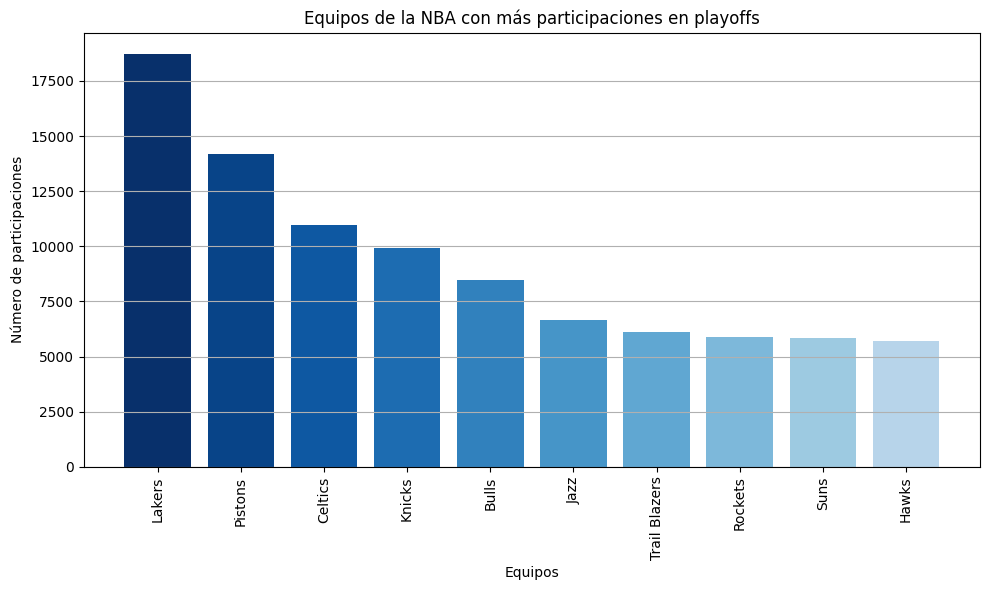

In [70]:
mas_participaciones = player_game_stats["team_name"].value_counts(ascending=False).head(10)
colores = plt.cm.Blues(np.linspace(1, 0.3, len(mas_participaciones)))
# Mostrar el resultado
plt.figure(figsize=(10, 6))
plt.bar(mas_participaciones.index, mas_participaciones.values, color=colores)
plt.title('Equipos de la NBA con más participaciones en playoffs')
plt.xlabel('Equipos')
plt.ylabel('Número de participaciones')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
# Gráfica del número de jugadores por equipo



3. Equipos que Han Anotado Más Puntos en los Playoffs
Vamos a calcular qué equipos han acumulado más puntos como locales a lo largo de los Playoffs.

In [80]:
# Agrupar por equipo y sumar los puntos anotados como locales
most_points_team= player_game_stats.groupby("team_name")["pts_home"].sum().sort_values(ascending=False).head(10)
most_points_team


,pts_home
team_name,
Lakers,2046302.0
Pistons,1405971.0
Celtics,1224618.0
Knicks,949428.0
Bulls,847592.0
Jazz,667375.0
Trail Blazers,649600.0
Suns,635895.0
Rockets,609630.0


* haga un grafico de barras en azul con estos resultados

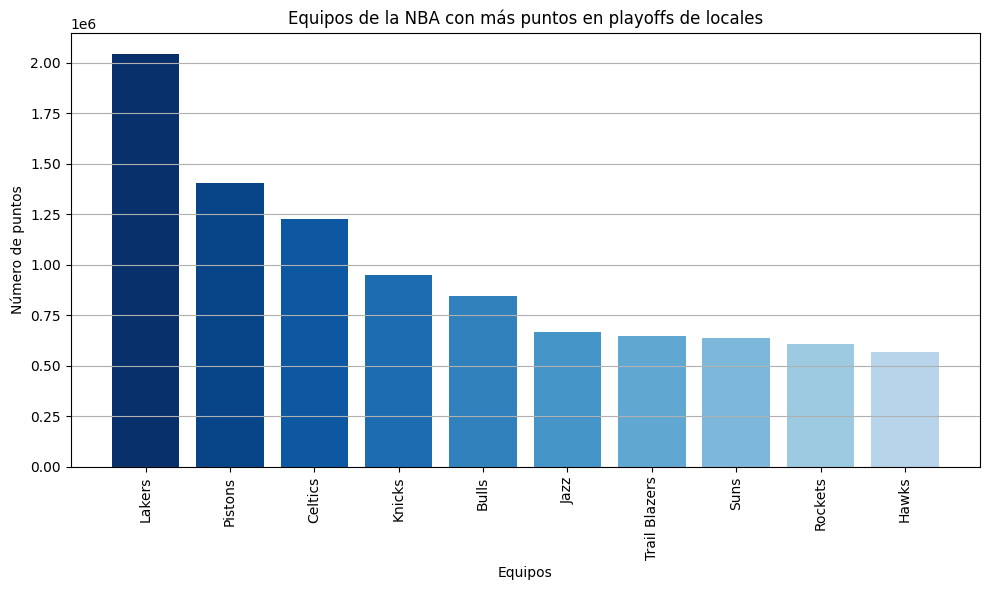

In [79]:
# Gráfica de los equipos con más puntos anotados
# Mostrar los equipos que más puntos han anotado
colors = plt.cm.Blues(np.linspace(1, 0.3, len(mas_participaciones)))
# Mostrar el resultado
plt.figure(figsize=(10, 6))
plt.bar(most_points_team.index, most_points_team.values, color=colors)
plt.title('Equipos de la NBA con más puntos en playoffs de locales')
plt.xlabel('Equipos')
plt.ylabel('Número de puntos')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
# Gráfica del número de jugadores por equipo

4. Equipos con Mejor Promedio de Puntos por Partido (en Casa)
Aquí calculamos el promedio de puntos por partido de cada equipo como local.

In [81]:
# Calcular el promedio de puntos por equipo en casa
most_points_average= player_game_stats.groupby("team_name")["pts_home"].mean().sort_values(ascending=False).head(10)
# Mostrar los equipos con mejor promedio de puntos en casa
most_points_average

,pts_home
team_name,
Nuggets,115.200000
Celtics,111.623188
Warriors,110.000000
Lakers,109.165217
Suns,108.700000
Mavericks,108.200000
Trail Blazers,106.491803
Bucks,105.720930
Thunder,104.813953


Hga un grafico en naranja de estos resultados

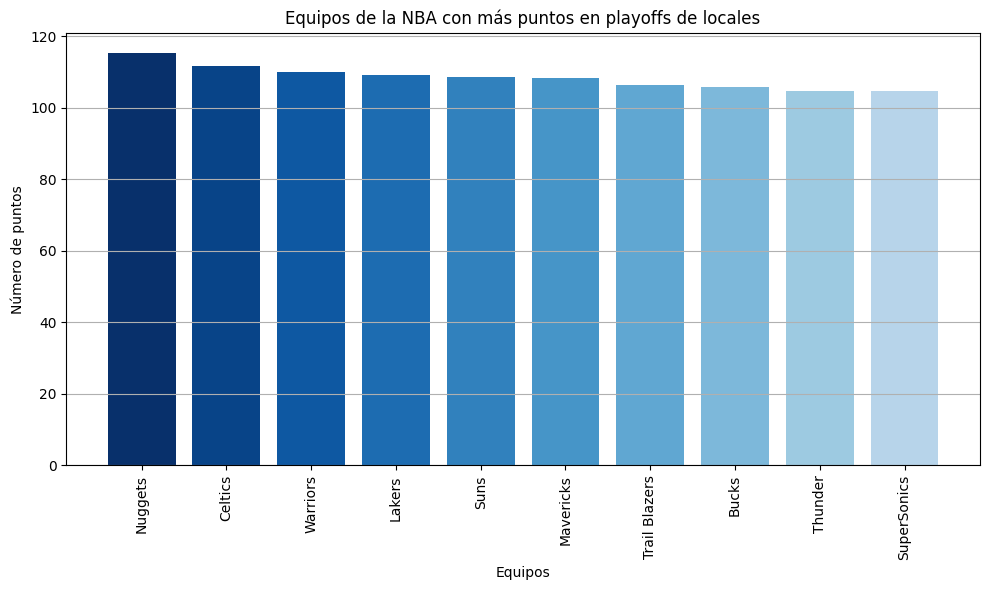

In [82]:
# Gráfica del promedio de puntos en casa por equipo
color = plt.cm.Blues(np.linspace(1, 0.3, len(mas_participaciones)))
# Mostrar el resultado
plt.figure(figsize=(10, 6))
plt.bar(most_points_average.index, most_points_average.values, color=color)
plt.title('Equipos de la NBA con más puntos en playoffs de locales')
plt.xlabel('Equipos')
plt.ylabel('Número de puntos')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

5. Temporadas con Mayor Cantidad de Puntos Anotados en los Playoffs
Vamos a identificar qué temporadas han tenido el mayor número de puntos totales anotados en los Playoffs. Cree una columna total_points con la suma de pts_home y pts_away, puede usar session_id

In [90]:
# Agrupar por temporada y sumar los puntos anotados
player_game_stats["total_points"] = player_game_stats["pts_home"]+player_game_stats["pts_away"]
# Mostrar las temporadas con más puntos
season_points= player_game_stats.groupby("season_id")["total_points"].sum()
season_points

,total_points
season_id,
41984.0,2015756.0
41985.0,1913714.0
41986.0,2173780.0
41987.0,2237579.0
41988.0,1786471.0
41989.0,1904809.0
41990.0,1919150.0
41991.0,1764815.0
41992.0,1723637.0


* Cree una serie de tiempo con esto:

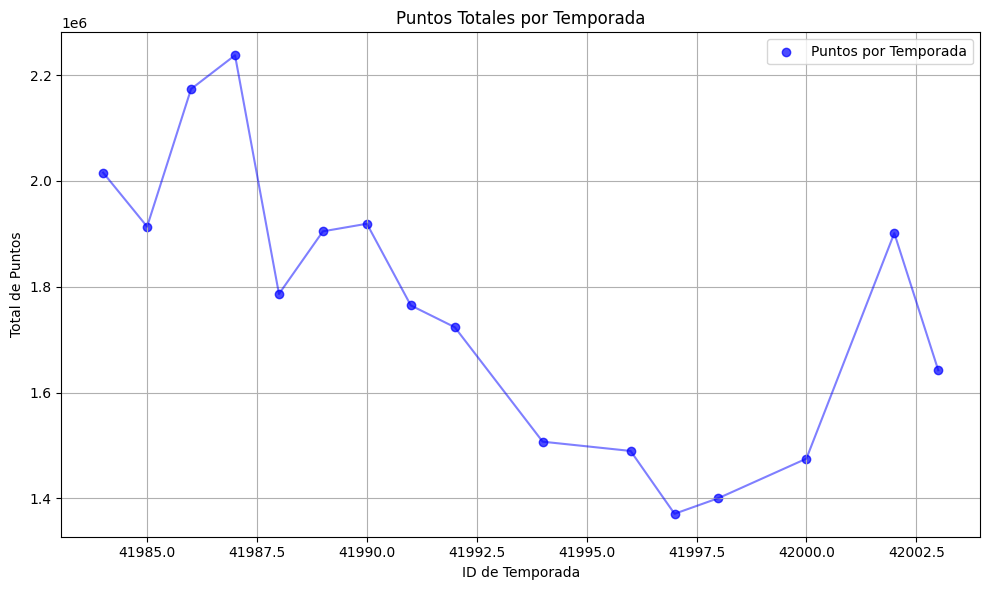

In [92]:
# Gráfica de las temporadas con más puntos
plt.figure(figsize=(10, 6))
plt.scatter(season_points.index, season_points.values, color='blue', alpha=0.7, label='Puntos por Temporada')
plt.plot(season_points.index, season_points.values, color='blue', linestyle='-', alpha=0.5)  # Conectar los puntos

# Añadir títulos y etiquetas
plt.title('Puntos Totales por Temporada')
plt.xlabel('ID de Temporada')
plt.ylabel('Total de Puntos')
plt.grid()
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

* Hay algun dato interesante en esta grafica

**RTA**: Antes de los años 90 los equipos hacían una mayor cantidad de puntos, pero después de 1990 la cantidad de puntos por temporada empezó a disminuir de manera progresiva. Esto puede ser porque antes el baloncesto era mucho más físico, después se volvió más técnico.
Jugadores como Shaquille O neal o Allen Iverson pudieron influir en el aumento de puntos en los años 2000.

# SECCION 3

1. Pivot Table: Comparación del Rendimiento por Posición y Equipo
Primero, crearemos una pivot table para comparar el rendimiento promedio de los jugadores en diferentes posiciones dentro de cada equipo, en términos de puntos anotados, rebotes, y asistencias.
 Variables de puntajes: ['pts_home', 'reb_home', 'ast_home'],
Variables utiles: ['team_name_home', 'position_y']


* Agrupe las posiciones (le pude ser util lo siguiente:

```
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})
```



In [105]:
# Crear una columna que agrupe las posiciones en roles más generales
player_game_stats['role'] = player_game_stats['position_y'].map({
    'PG': 'Base', 'SG': 'Base', 'PG-SG': 'Base', 'SG-PG': 'Base',
    'SF': 'Ala', 'SF-PF': 'Ala', 'PF-SF': 'Ala',
    'PF': 'Pivote', 'C': 'Pivote', 'PF-C': 'Pivote'
})

# Crear pivot table agrupando por los roles
pivot_table2 = pd.pivot_table(player_game_stats, values=['pts_home', 'reb_home', 'ast_home'], index=['team_name_home', 'role'], aggfunc='mean')
pivot_table2
# Graficar por roles agrupados

ast_home    pts_home   reb_home
team_name_home     role                                    
Atlanta Hawks      Ala     22.882353   99.382353  41.617647
                   Base    22.882353   99.382353  41.617647
                   Pivote  22.882353   99.382353  41.617647
Boston Celtics     Ala     26.811594  111.623188  43.652174
                   Base    26.811594  111.623188  43.652174
...                              ...         ...        ...
Utah Jazz          Base    23.042857  100.357143  43.371429
                   Pivote  23.042857  100.357143  43.371429
Washington Bullets Ala     18.000000  103.625000  35.500000
                   Base    18.000000  103.625000  35.500000
                   Pivote  18.000000  103.625000  35.500000

[88 rows x 3 columns]

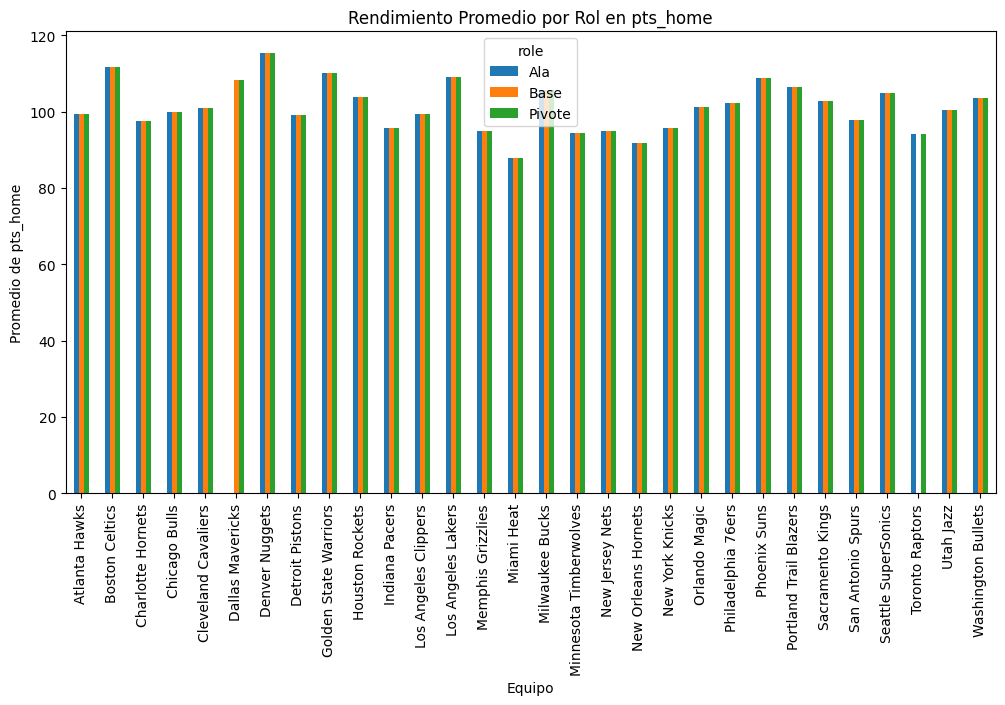

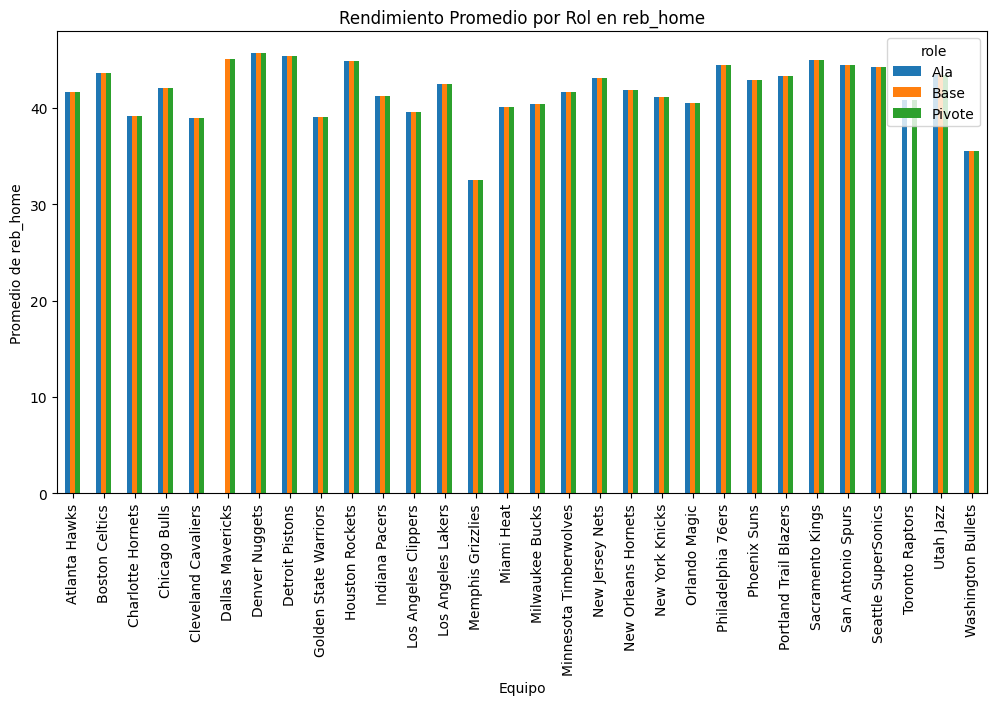

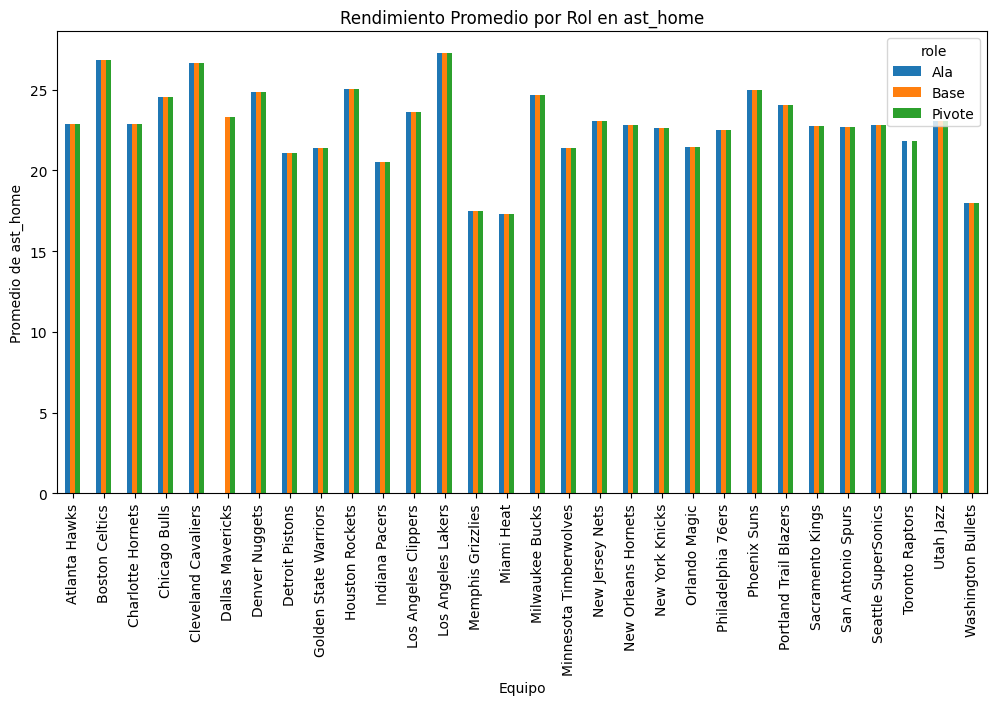

In [108]:
for stat in ['pts_home', 'reb_home', 'ast_home']:
  pivot_table2[stat].unstack().plot(kind='bar', figsize=(12, 6))
  plt.title(f'Rendimiento Promedio por Rol en {stat}')
  plt.xlabel('Equipo')
  plt.ylabel(f'Promedio de {stat}')
  plt.xticks(rotation=90)
  plt.show()


# Crear una crosstab para analizar victorias por posición de los jugadores
utilice position_y y wl_home

In [111]:
# Crear una crosstab para analizar victorias por posición de los jugadores
crosstab_wins = pd.crosstab(player_game_stats['position_y'], player_game_stats['wl_home'])
# Mostrar el resultado de la crosstab
crosstab_wins

wl_home,L,W
position_y,,
C,546,1055
C-PF,170,271
PF,1192,2321
PF-C,341,699
PF-SF,136,270
PG,1160,2362
PG-SG,243,554
SF,860,1600
SF-PF,256,459


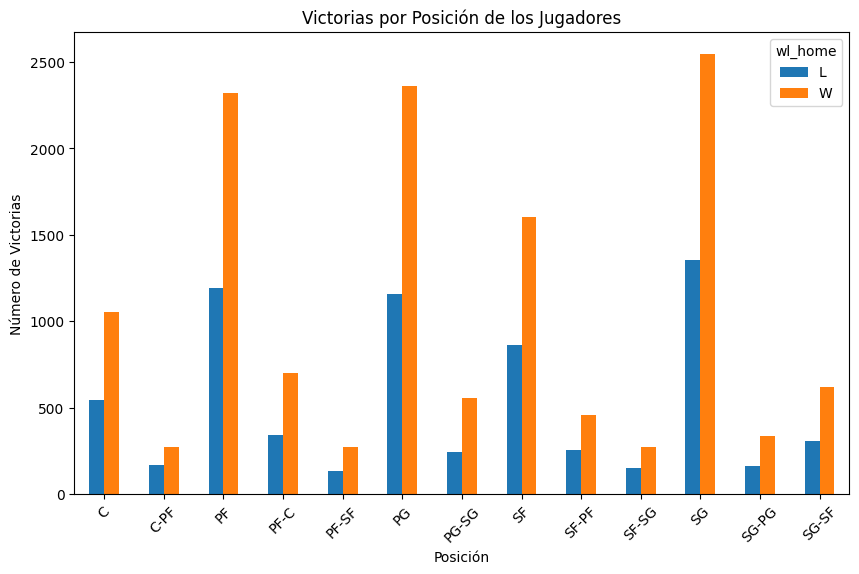

In [112]:
# Gráfica para visualizar la pivot table
crosstab_wins.plot(kind='bar', figsize=(10, 6))
plt.title('Victorias por Posición de los Jugadores')
plt.xlabel('Posición')
plt.ylabel('Número de Victorias')
plt.xticks(rotation=45)
plt.show()

Sección 4: Análisis de Series de Tiempo y Identificación del Mejor Equipo

Vamos a usar series de tiempo para observar cómo los equipos han evolucionado en términos de puntos anotados, victorias, y otros indicadores a lo largo del tiempo.
1. Evolución de los Puntos Anotados por Temporada (Serie de Tiempo)session_id y pts_home
Este análisis mostrará cómo ha cambiado el promedio de puntos anotados en los Playoffs a lo largo de las temporadas.

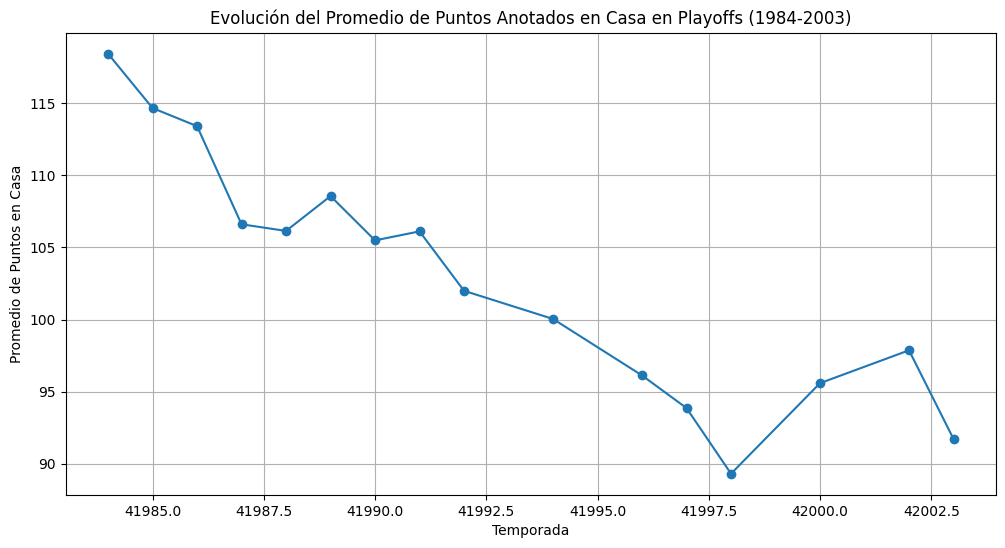

In [113]:
# Agrupar por temporada y calcular el promedio de puntos en casa
average_points_home = player_game_stats.groupby('season_id')['pts_home'].mean()

# Graficar la evolución del promedio de puntos por temporada
plt.figure(figsize=(12, 6))
plt.plot(average_points_home.index, average_points_home.values, marker='o', linestyle='-')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')
plt.title('Evolución del Promedio de Puntos Anotados en Casa en Playoffs (1984-2003)')
plt.grid(True)
plt.show()

2. Evolución del Rendimiento del Mejor Equipo a lo Largo del Tiempo
Primero, identificamos el equipo que ha anotado más puntos en total y luego analizamos cómo ha evolucionado su rendimiento en los Playoffs.

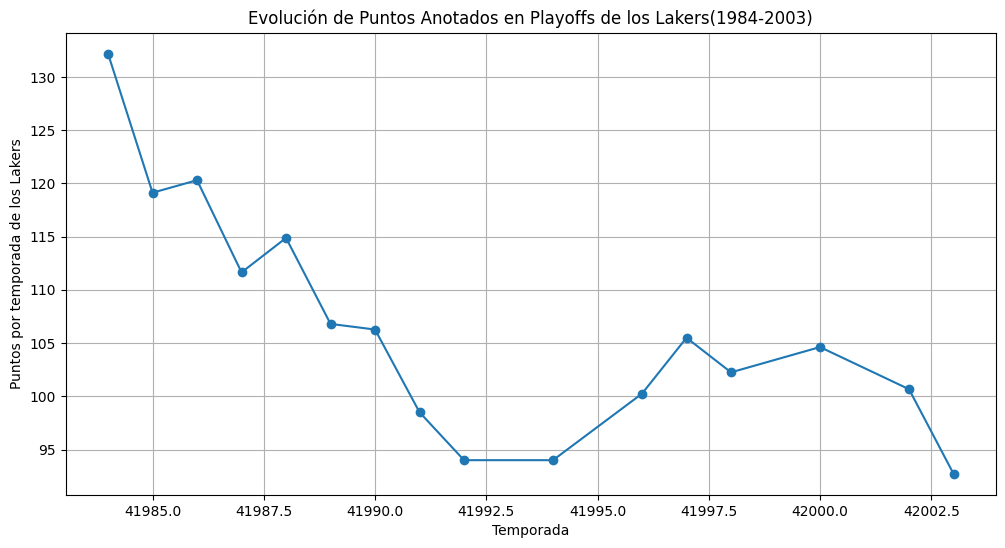

In [124]:
# Identificar el equipo con más puntos anotados en total
most_points_team= player_game_stats.groupby("team_name")["pts_home"].sum().sort_values(ascending=False).head(1)
# Filtrar los datos para ese equipo y agrupar por temporada
player_game_stats= player_game_stats[player_game_stats["team_name"]== "Lakers"]
number_one= player_game_stats.groupby("season_id")["pts_home"].mean()
# Graficar la evolución del rendimiento del equipo
plt.figure(figsize=(12, 6))
plt.plot(number_one.index, number_one.values, marker='o', linestyle='-')
plt.xlabel('Temporada')
plt.ylabel('Puntos por temporada de los Lakers')
plt.title('Evolución de Puntos Anotados en Playoffs de los Lakers(1984-2003)')
plt.grid(True)
plt.show()

Sección 5: Identificación del Mejor Jugador y Análisis Específico
Ahora vamos a centrarnos en identificar al mejor jugador y analizar su rendimiento a lo largo de las temporadas.

3. Identificación del Jugador con Más Puntos Anotados
Primero identificamos al jugador que ha anotado más puntos en los Playoffs y luego analizamos su evolución.

In [133]:
# Agrupar por jugador y sumar los puntos anotados
total_points = player_game_stats.groupby('player_name')['pts_home'].sum().sort_values(ascending=False)
# Mostrar el jugador con más puntos anotados en los Playoffs

top_player = total_points.idxmax()
print(f"El jugador con más puntos anotados en los Playoffs es: {top_player}")


El jugador con más puntos anotados en los Playoffs es: Andrew Goudelock


4. Evolución del Rendimiento del Mejor Jugador
Analizamos cómo ha cambiado el rendimiento del jugador con más puntos anotados a lo largo de los años.

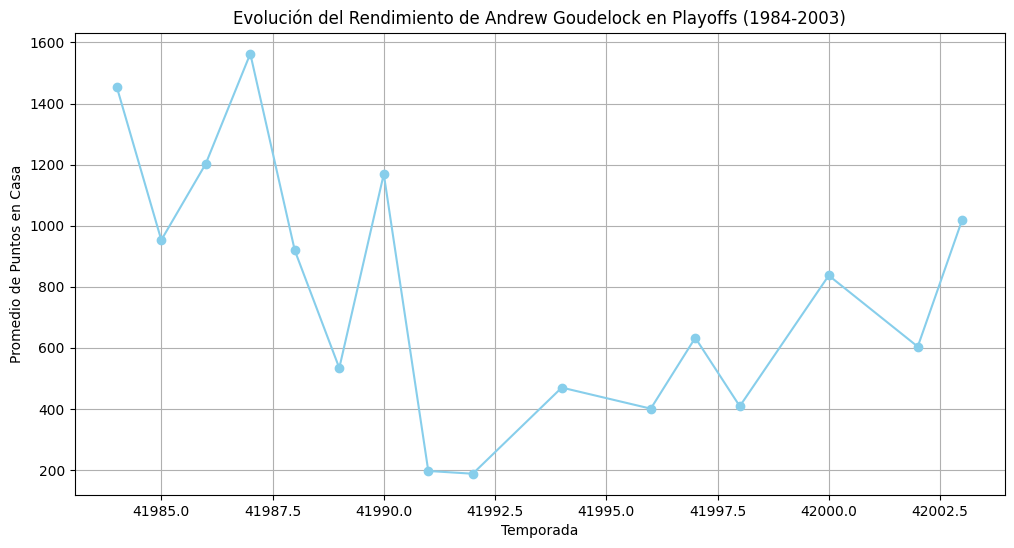

In [134]:
top_scorer_performance = player_game_stats[player_game_stats['player_name'] == top_player].groupby('season_id')['pts_home'].sum()

# Graficar la evolución del rendimiento del jugador
plt.figure(figsize=(12, 6))
plt.plot(top_scorer_performance.index, top_scorer_performance.values, marker='o', color='skyblue')
plt.title(f'Evolución del Rendimiento de {top_player} en Playoffs (1984-2003)')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos en Casa')
plt.grid(True)
plt.show()

5. Comparación entre Jugadores (Puntos por Partido)
Realizamos una comparación entre los jugadores para ver quiénes han sido los más efectivos en términos de puntos anotados por partido.

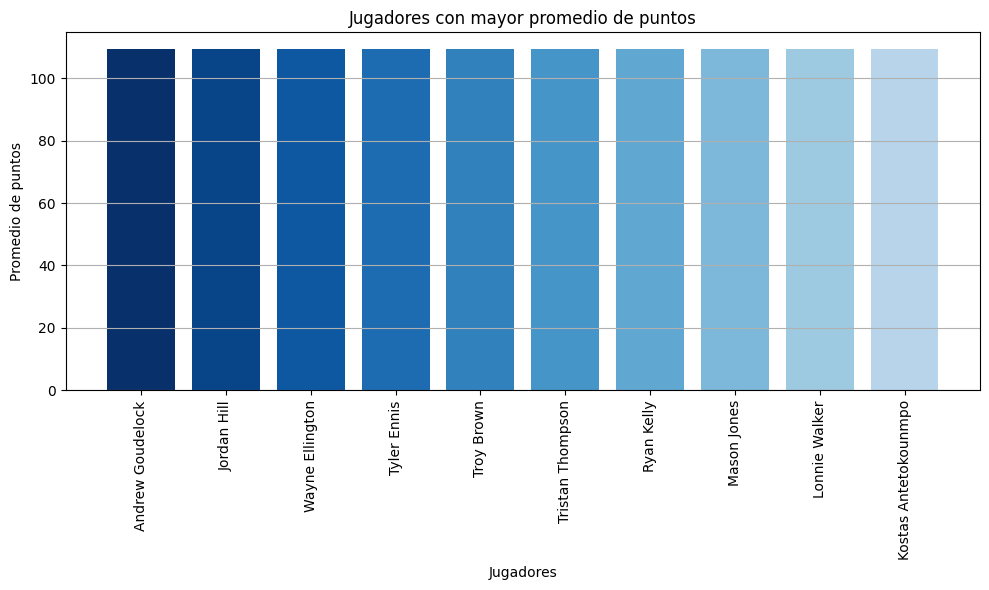

In [137]:
# Agrupar por jugador y calcular el promedio de puntos por partido
most_scores= player_game_stats.groupby('player_name')['pts_home'].mean().sort_values(ascending=False).head(10)
# Graficar los 10 jugadores con mejor promedio de puntos por partido
color = plt.cm.Blues(np.linspace(1, 0.3, len(mas_participaciones)))
# Mostrar el resultado
plt.figure(figsize=(10, 6))
plt.bar(most_scores.index, most_scores.values, color=color)
plt.title('Jugadores con mayor promedio de puntos')
plt.xlabel('Jugadores')
plt.ylabel('Promedio de puntos')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

6. Desempeño de un Jugador Específico
Podemos enfocarnos en un jugador en particular (puedes reemplazar el ID por el jugador que te mas puntos tenga) para analizar su rendimiento a lo largo del tiempo.
* Filtre person_id con el id específico
* Agrupe puntos por id de temporada.
* Analice el rendimiento del Jugador
* Busque en la base de datos la columna la columna first_name_x	last_name_x el person_id que le dio

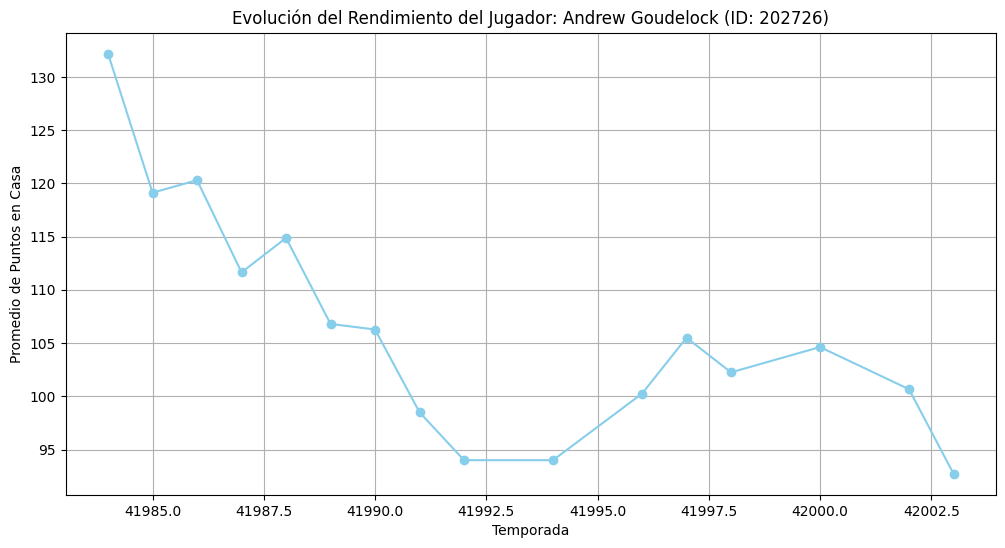

In [142]:
player_name_to_analyze = "Andrew Goudelock"
if player_name_to_analyze in player_game_stats['player_name'].values:
    # Obtener el ID del jugador
    player_id_to_analyze = player_game_stats[player_game_stats['player_name'] == player_name_to_analyze]['person_id'].value_counts().idxmax()

    # Filtrar los datos para ese jugador y agrupar por temporada
    player_performance = player_game_stats[player_game_stats['person_id'] == player_id_to_analyze].groupby('season_id')['pts_home'].mean()

    # Graficar el rendimiento de ese jugador a lo largo de las temporadas
    plt.figure(figsize=(12, 6))
    plt.plot(player_performance.index, player_performance.values, marker='o', color='skyblue')
    plt.title(f'Evolución del Rendimiento del Jugador: {player_name_to_analyze} (ID: {player_id_to_analyze})')
    plt.xlabel('Temporada')
    plt.ylabel('Promedio de Puntos en Casa')
    plt.grid(True)
    plt.show()
else:
    print(f"No se encontró el jugador: {player_name_to_analyze}")


8. Relación entre el Tiempo de Experiencia
`"season_exp"` y los Puntos Anotados `pts_home` Finalmente, analizamos si hay una relación entre el tiempo de experiencia de un jugador y su rendimiento en los Playoffs.
* Haga un groupby
* Haga una Grafica de serie de tiempo
* Analice: ¿Los jugadores con más años de experiencia tienden a anotar más puntos en los Playoffs?

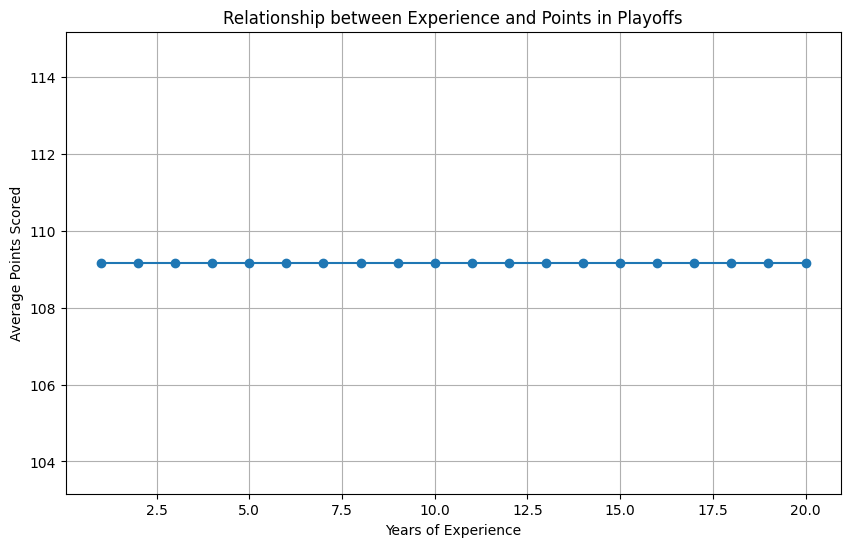

In [148]:
experience_points = player_game_stats.groupby('season_exp')['pts_home'].mean()
plt.figure(figsize=(10, 6))
plt.plot(experience_points.index, experience_points.values, marker='o')
plt.xlabel('Years of Experience')
plt.ylabel('Average Points Scored')
plt.title('Relationship between Experience and Points in Playoffs')
plt.grid(True)
plt.show()

## SECCION 7 : Preguntas de Negocio

1. ¿Qué factores crees que han influido en la evolución del rendimiento del mejor equipo a lo largo de los años?

Creo que el talento de los jugadores fichados por los equipos influye en el rendimiento de los Lakers a lo largo de los años. También la constancia en el entrenamiento y la motivación de los jugadores.
En cuanto a los directivos, es importante que el plantel de jugadores se pueda entender, armar combinaciones de jugadores (como Shaq y Kobe) que puedan sobresalir

2. Al observar el rendimiento del mejor jugador a lo largo del tiempo, ¿qué puedes inferir sobre su consistencia y su impacto en los Playoffs? ¿Qué harías como entrenador para mantener o mejorar su rendimiento?

Su rendimiento a lo largo de los años fue disminuyendo, posiblemente porque su edad llegó a ser un limitante para el. Aún así 90 puntos (lo mínimo que el encestó en play off) puede llegar a ser significativo para un equipo, y que muchas veces los partidos se definen por 1 punto.

Yo le daría entrenamientos personalizados enfocados a mejorar sus falencias físicas y tácticas. Así mismo le daría incentivos para que siga mejorando.

3. ¿Qué papel crees que juegan las posiciones de los jugadores en el éxito de un equipo en los Playoffs? ¿Hay alguna posición que consideres clave para aumentar las probabilidades de victoria?

Las posiciones más determinantes son el shooting guard(escolta), point guard(base) y power forward (Ala pívot), 3 posiciones muy diferentes, por ende una sola posición no es determinante. Lo importante es lograr hacer que los jugadores con estas posicisiones jueguen con comunicación y armonía. Ya que el base organiza las jugadas, el escolta es especialista en meter puntos y el pivot tiene la capacidad de meter una gran cantidad de puntos debajo del aro y coger rebotes.